In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Configuring matplotlib to display and save images with a white background
plt.rcParams['figure.facecolor'] = 'white'

# Reading the data from the csv file
raw_data = pd.read_csv('crimes-19-m.csv', decimal=".", sep=",")
np.set_printoptions(suppress=True)

# Defining some regular bins
# Bin for variation coefiecient
bins_var = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]

# Bin for values between 0 and 1
bins_from_zero = [0, 0.2, 0.4, 0.6, 0.8, 1]

,Crimes
count,100000.000000
mean,1148.654250
std,806.526455
min,31.000000
25%,610.000000
50%,890.000000
75%,1320.000000
max,5132.000000
mode,820.000000


,Nº de crimes
31,836
33,67
41,482
51,643
110,89
...,...
5121,1
5122,1
5130,6
5131,8


,Nº de crimes (Com Prisão)
31,776
33,61
41,425
51,489
110,49
...,...
5011,60
5093,8
5122,1
5130,2


<AxesSubplot:ylabel='IUCR'>

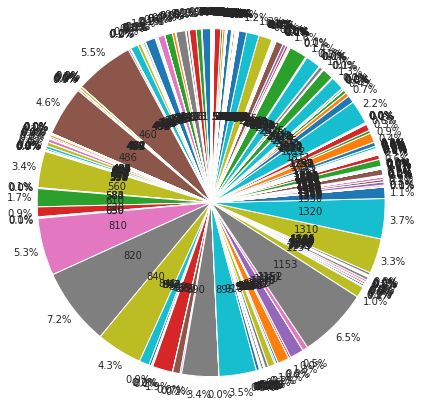

In [2]:
curColumn = raw_data['IUCR']

fPorDistrito = curColumn[raw_data['Arrest'] == 1]
empresasFalidasPorDistrito = pd.DataFrame(fPorDistrito.value_counts().sort_index())
empresasFalidasPorDistrito.columns = ['Nº de crimes (Com Prisão)']

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Crimes']
display(dfSummary)

totalPerAtrr = pd.DataFrame(curColumn.value_counts().sort_index())
totalPerAtrr.columns = ['Nº de crimes']
display(totalPerAtrr)
display(empresasFalidasPorDistrito)

curColumn.value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    radius=2,
    pctdistance=1.1,
    labeldistance=0.5
)



,Valor
count,100000.000000
mean,11.249860
std,6.985843
min,1.000000
25%,5.000000
50%,10.000000
75%,17.000000
max,31.000000
mode,11.000000


,Nº de crimes (Com Prisão)
1,4062
2,4085
3,3632
4,3772
5,4590
6,4109
7,3557
8,4475
9,3151
10,2886


,Nº de crimes
1,4907
2,5222
3,4701
4,4821
5,6022
6,5309
7,5211
8,5578
9,4253
10,4067


<AxesSubplot:ylabel='District'>

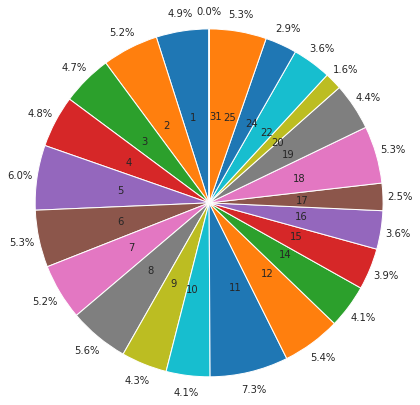

In [3]:
curColumn = raw_data['District']

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']
display(dfSummary)

fPorNace = curColumn[raw_data['Arrest'] == 1]
naceInsolvidos = pd.DataFrame(fPorNace.value_counts().sort_index())
naceInsolvidos.columns = ['Nº de crimes (Com Prisão)']
display(naceInsolvidos)


totalPerAtrr = pd.DataFrame(curColumn.value_counts().sort_index())
totalPerAtrr.columns = ['Nº de crimes']
display(totalPerAtrr)
curColumn.value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    radius=2,
    pctdistance=1.1,
    labeldistance=0.5
)



,Valor
count,100000.000000
mean,0.883650
std,0.320646
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000
mode,1.000000


,Nº de crimes
0,11635
1,88365


<AxesSubplot:ylabel='Domestic'>

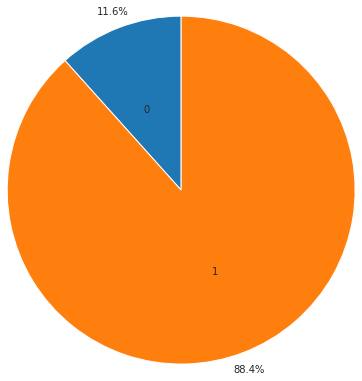

In [4]:
curColumn = raw_data['Domestic']
var_nace2 = curColumn.unique()
var_nace2.sort()

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']
display(dfSummary)

totalPerAtrr = pd.DataFrame(curColumn.value_counts().sort_index())
totalPerAtrr.columns = ['Nº de crimes']
display(totalPerAtrr)

curColumn.value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    radius=2,
    pctdistance=1.1,
    labeldistance=0.5
)

,Valor
count,100000.000000
mean,2011.820510
std,6.959517
min,2001.000000
25%,2005.000000
50%,2015.000000
75%,2019.000000
max,2019.000000
mode,2019.000000


,Número de crimes por cada 5 anos
"(2000, 2005]",27975
"(2005, 2010]",17916
"(2010, 2015]",9928
"(2015, 2020]",44181
"(2020, 2025]",0


<AxesSubplot:>

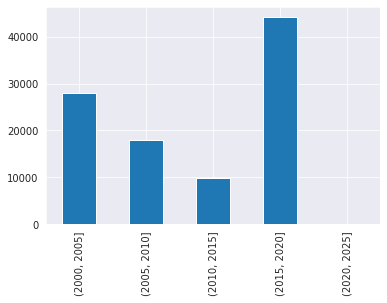

In [5]:
curColumn = raw_data['Year']
var_empregados = curColumn.unique()
var_empregados.sort()

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']

bins = [2000, 2005, 2010, 2015, 2020, 2025]
curColumn = pd.cut(curColumn, bins)

dfIntervals = pd.DataFrame(curColumn.value_counts().sort_index())
dfIntervals.columns = ['Número de crimes por cada 5 anos']

display(dfSummary)
display(dfIntervals)
curColumn.value_counts().sort_index().plot.bar()


,Valor
count,100000.000000
mean,2011.820510
std,6.959517
min,2001.000000
25%,2005.000000
50%,2015.000000
75%,2019.000000
max,2019.000000
mode,2019.000000


,Número de registos (anos disponíveis base)
2001,2869
2002,15225
2003,3906
2004,2182
2005,3793
2006,2555
2007,1325
2008,7036
2009,6661
2010,339


<AxesSubplot:ylabel='Year'>

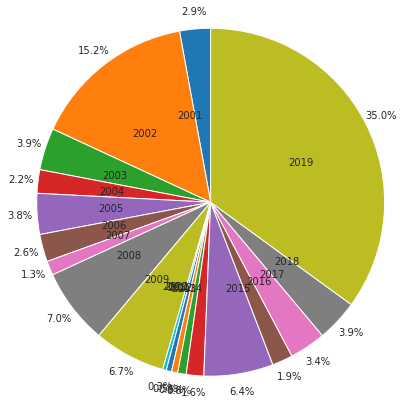

In [6]:
curColumn = raw_data['Year']
var_num_anos_disponiveis_base = curColumn.unique()

colSummary = curColumn.describe()
colSummary.loc['mode'] = curColumn.mode().tolist()[0]
dfSummary = pd.DataFrame(colSummary)
dfSummary.columns = ['Valor']

dfIntervals = pd.DataFrame(curColumn.value_counts().sort_index())
dfIntervals.columns = ['Número de registos (anos disponíveis base)']

display(dfSummary)
display(dfIntervals)

curColumn.value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    radius=2,
    pctdistance=1.1,
    labeldistance=0.5
)

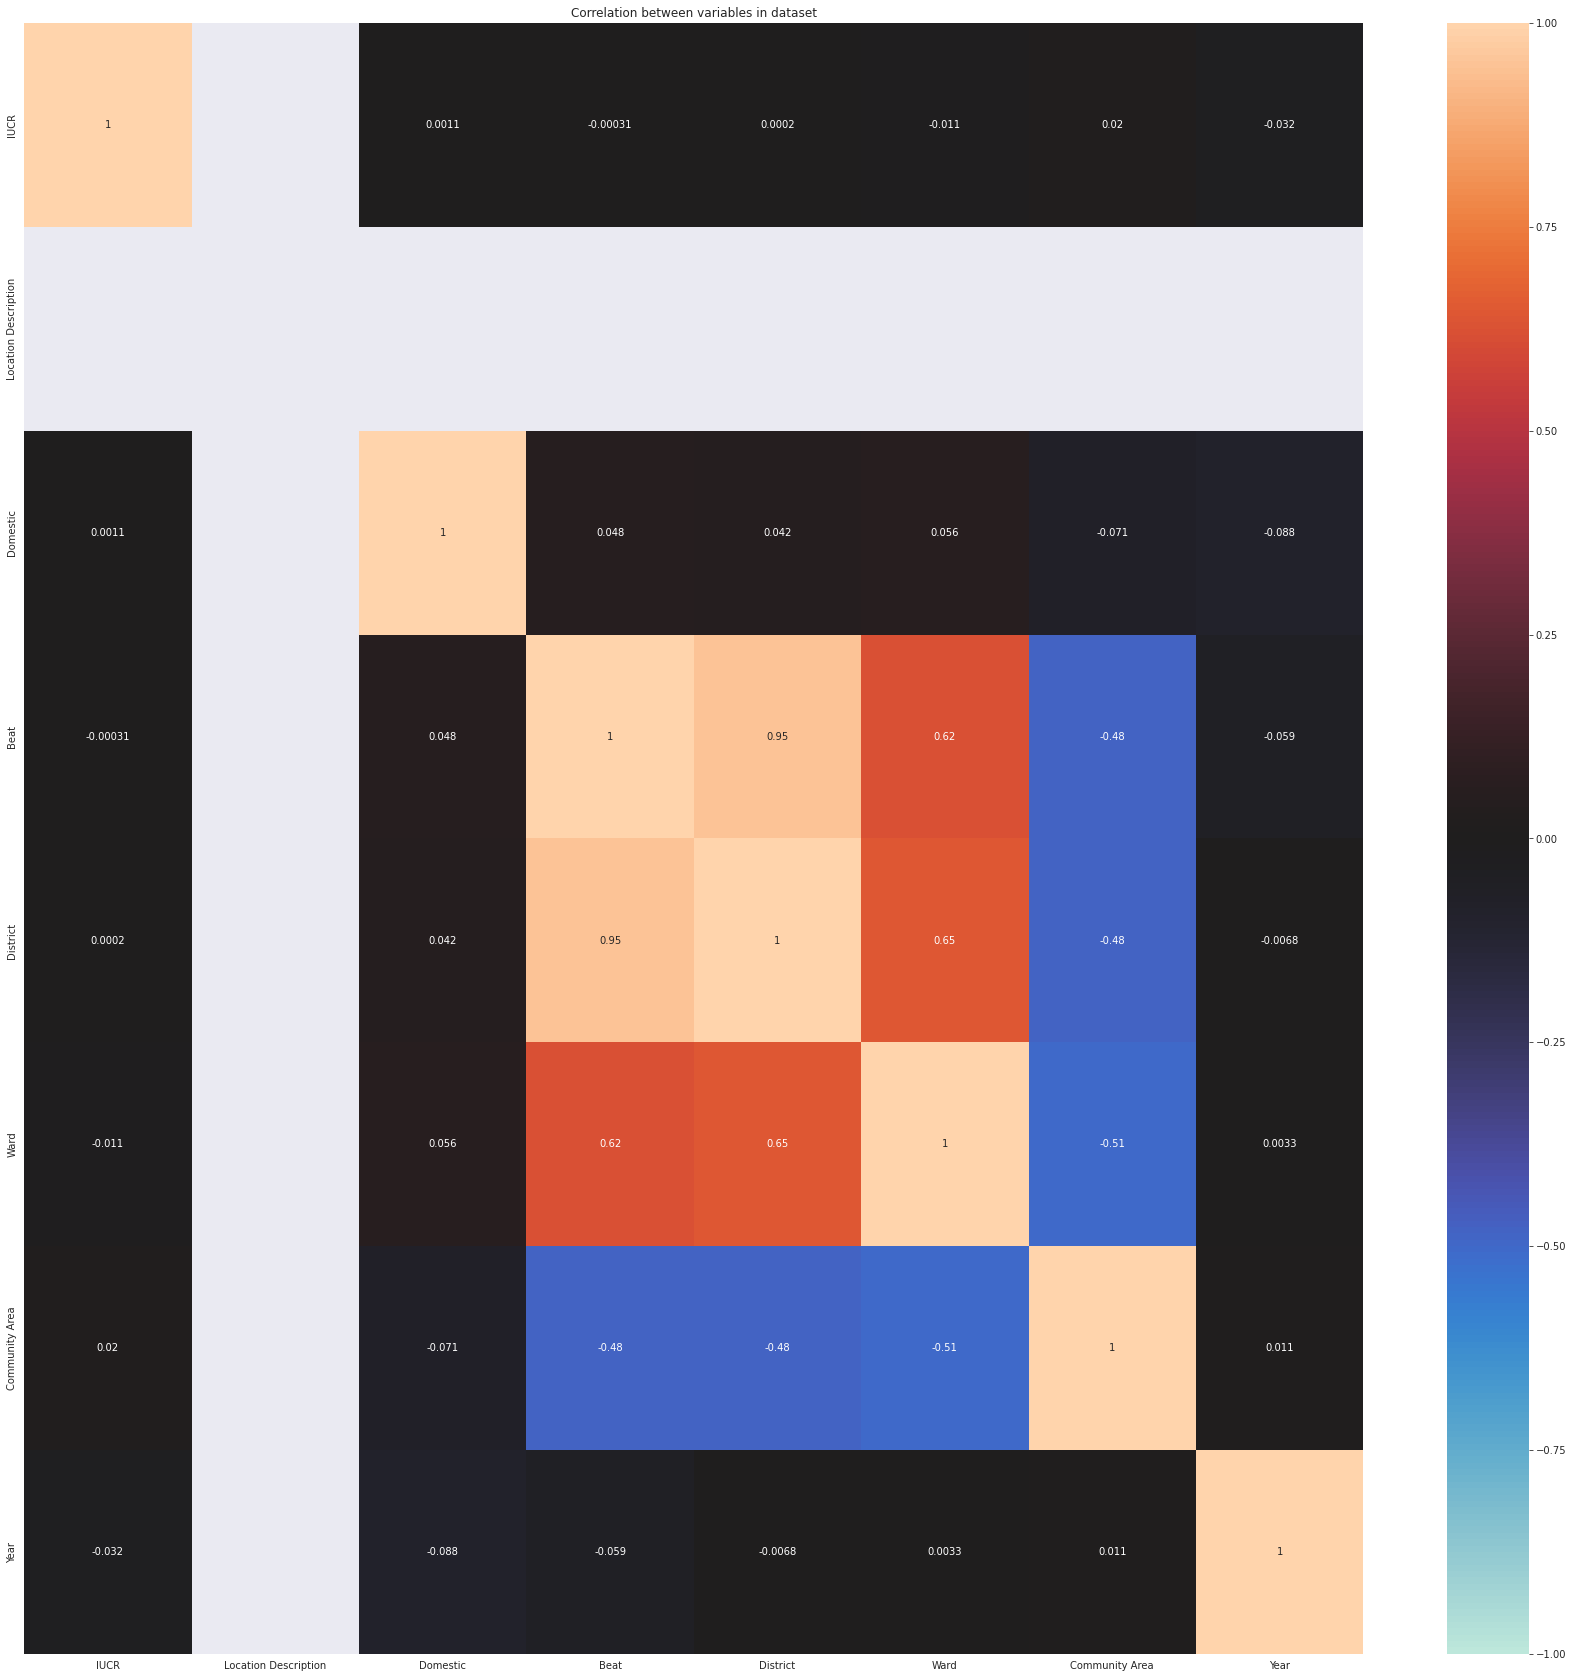

In [7]:
# Configuring the matplotlib figure size and title
fig, ax = plt.subplots(figsize=(30,30))
ax.set_title('Correlation between variables in dataset')

# Excluding the categorical columns from dataframe
filtered_data = raw_data.drop(["Arrest"], axis=1)
heatmap = sns.heatmap(filtered_data.corr(), vmin=-1, vmax=1, annot=True, ax=ax, cmap="icefire")

# Saving the image to a file
plt.savefig('correlation_matrix.png', bbox_inches="tight")

In [8]:
raw_data.head()

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
0,1153,0,1,1,412,4,8.0,45.0,2001
1,281,0,1,1,2222,22,21.0,73.0,2017
2,620,0,1,1,835,8,18.0,70.0,2017
3,810,0,1,1,313,3,20.0,42.0,2017
4,281,0,1,1,122,1,42.0,32.0,2017


<AxesSubplot:>

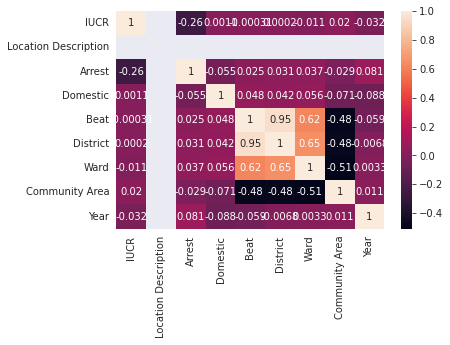

In [9]:
import seaborn as sn
m=raw_data.corr()
sn.heatmap(m, annot=True)

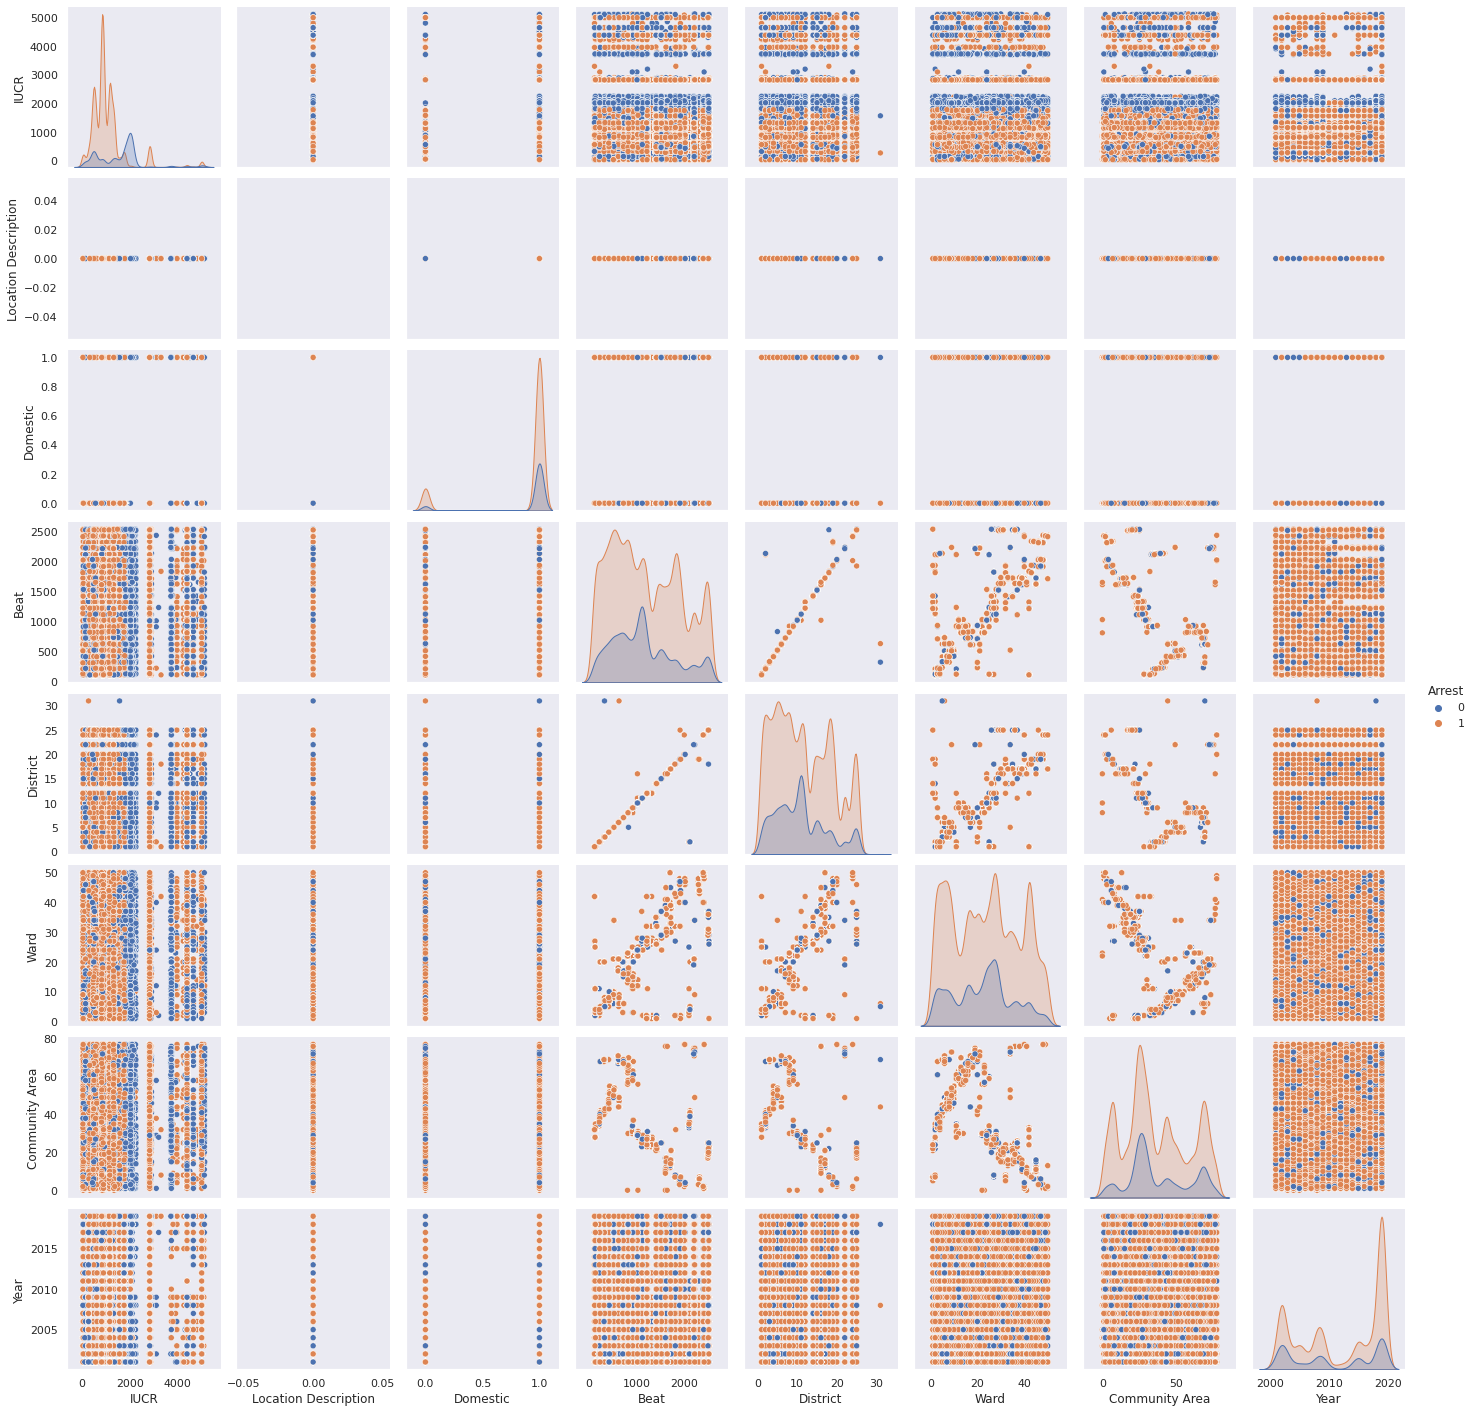

In [10]:
sn.set_theme(style="dark")
g=sn.pairplot(raw_data, hue="Arrest")
g.savefig("scatterplot_matrix.png")